In [1]:
import math
# Sigmoid turns z into a chance (0 to 1)
def Sigmoid(z):
    return 1 / (1 + math.exp(-z))

hours = 5
z = -1.5 + 0.6 * hours # Formula
chance = Sigmoid(z)  # Get Chance
prediction = "Pass" if chance > 0.5 else "Fail" # Decide
print(f"Chance of passing:{chance:.2f} (That's {chance*100:.0f}%)")
print(f"Prediction:{prediction}")

Chance of passing:0.82 (That's 82%)
Prediction:Pass


In [2]:
hours_list = [2,4,6]
for hours in hours_list:
    z = -1.5 + 0.6 * hours
    chance = Sigmoid(z)
    prediction = "Pass" if chance > 0.5 else "Fail" 
    print(f"Hours: {hours}, Chance: {chance:.2f}, Prediction: {prediction}")

Hours: 2, Chance: 0.43, Prediction: Fail
Hours: 4, Chance: 0.71, Prediction: Pass
Hours: 6, Chance: 0.89, Prediction: Pass


In [5]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


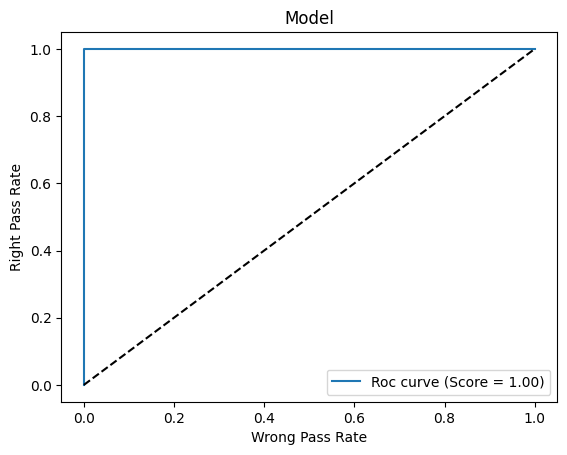

Score = 1.0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import numpy as np

#data
hours = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
real = [0,0,0,1,1,1,1,1,1,1]

model = LogisticRegression()
model.fit(hours,real)
chances = model.predict_proba(hours)[:, 1] # chance of pass

#make the curve
false_rate , true_rate , _ = roc_curve(real,chances)
area = auc(false_rate,true_rate)

# draw
plt.plot(false_rate,true_rate , label=f"Roc curve (Score = {area:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Wrong Pass Rate")
plt.ylabel("Right Pass Rate")
plt.title("Model")
plt.legend()
plt.show()
print("Score =",area)